# Exercise 5 B

In [1]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [2]:
faces = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [3]:
faces.data.shape

(400, 4096)

In [4]:
faces.images.shape

(400, 64, 64)

In [5]:
faces.target.shape

(400,)

In [6]:
faces.target[200]

20

#### 1. Plot the image of index zero

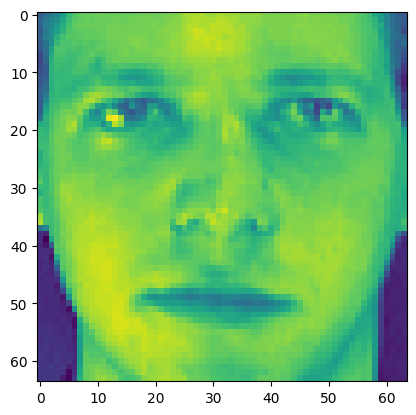

In [41]:
# put your answer here

plt.imshow(faces.images[0])


#### 2. Create a subplot of 10 images in a 3x3 configuration

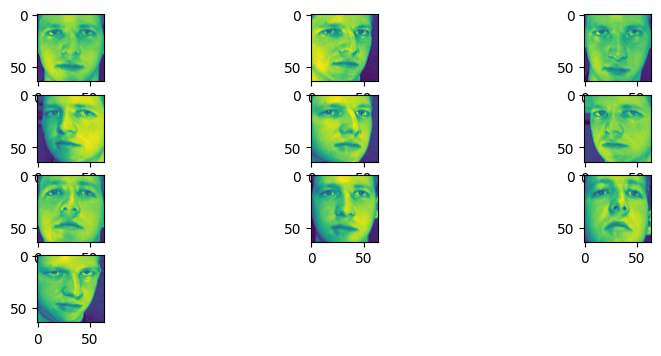

In [46]:
# put your answer here

plt.figure(figsize=(10,4))
for index, (image, label) in enumerate(zip(faces.images[0:10], faces.images[0:10])):
    plt.subplot(4,3, index + 1)
    plt.imshow(image)


#### 3. Split the data into a training and test set

In [48]:
# put your answer here
train_img, test_img, train_lbl, test_lbl = train_test_split(
    faces.data, faces.target, test_size=1/7.0, random_state=0)


#### 4. Create a new instance of the LogisticRegression class

In [49]:
# put your answer here
logisticRegr = LogisticRegression()


#### 5. Train the model using the training set using the `fit()` function

In [50]:
# put your answer here
logisticRegr.fit(train_img, train_lbl)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### 6. Use the test data to test the model using the `predict()` function

In [59]:
# put your answer here
logisticRegr.predict(test_img[0].reshape(1,-1))


array([13])

In [60]:
logisticRegr.predict(test_img[0:10])

array([13, 30, 34, 19, 24,  6, 15, 26, 14, 21])

In [62]:
predictions = logisticRegr.predict(test_img)

#### 7. Get the accuracy using the `score()` function

In [63]:
# put your answer here
score = logisticRegr.score(test_img, test_lbl)
print(score)

0.9655172413793104


#### 8. Collect all the misclassified images and create a plot for visualization

In [64]:
# put your answer here

index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
    if label != predict:
        misclassifiedIndexes.append(index)
    index +=1


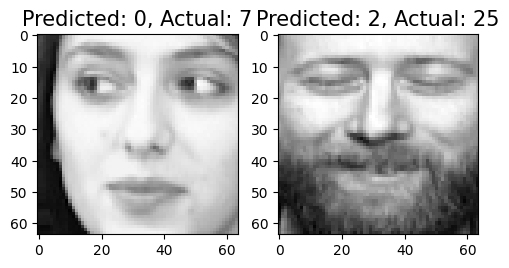

In [75]:
plt.figure(figsize=(15,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(test_img[badIndex], (64,64)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], test_lbl[badIndex]), fontsize = 15)

## Gradient Descent

#### 9. Use the `SGDClassifier()` to use gradient descent to minimize the loss

In [160]:
# put your answer here

sgdclf = SGDClassifier(loss="log_loss", penalty="l2", alpha=0.0001, learning_rate="optimal", eta0=0.0)


#### 10. Train the model using the training set using the `fit()` function

In [161]:
# put your answer here
sgdclf.fit(train_img, train_lbl)

SGDClassifier(loss='log_loss')

#### 11. Use the test data to test the model using the `predict()` function

In [162]:
# put your answer here
y_predic = sgdclf.predict(test_img)

#### 12. Get the accuracy using the `score()` function

In [163]:
# put your answer here
score = sgdclf.score(test_img, test_lbl)
print(score)

0.9137931034482759


#### 13. Find the best number of iterations to get the best accuracy

0.8620689655172413
0.5517241379310345
0.8620689655172413
0.7931034482758621
0.8793103448275862
0.8793103448275862
0.8275862068965517
0.9137931034482759


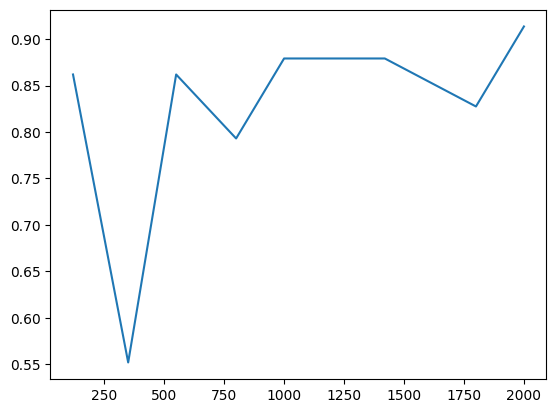

In [175]:
# put your answer here

iter = [120, 350, 550, 800, 1000, 1420, 1800, 2000]
scores=[]

for i in iter:
  sgdclf = SGDClassifier(loss="log_loss", penalty="l2", max_iter=i)
  sgdclf.fit(train_img, train_lbl)
  y_predic = sgdclf.predict(test_img)
  score = sgdclf.score(test_img, test_lbl)
  scores.append(score)
  print(score)

plt.plot(iter, scores)

#0.9138 accuracy for iter 2000